In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

#### Instantiate a BaseAnnotation object and a SpotAnnotationAnalysis object. Slice the annotation dataframe for one image.

In [2]:
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/datasets/density_test/Spot_density.json'
img_filename = 'snr_5_0_density_0.008_spot_img.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/datasets/density_test/spot_images/snr_5_0_density_0.008_spot_img.png'
csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/datasets/density_test/spot_data/snr_5_0_density_0.008_coord_snr_list.csv'

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()
anno_one_image = ba.slice_by_image(anno_all, img_filename)

#### Cluster annotations.

In [3]:
clustering_params = ['AffinityPropagation', -350]
clusters = sa.get_clusters(anno_one_image, clustering_params)
ba.print_head(clusters)

  centroid_x centroid_y                                            members
0        236        270  [[236, 270, 820, A16E62HXYVRQLI], [238, 268, 6...
1        214        260  [[214, 260, 1083, A16E62HXYVRQLI], [216, 260, ...
2        244        249  [[244, 249, 861, A16E62HXYVRQLI], [246, 250, 8...
3        255        245  [[255, 245, 1202, A16E62HXYVRQLI], [253, 241, ...
4        272        176  [[272, 176, 781, A16E62HXYVRQLI], [272, 174, 6...


#### Assemble a dataframe of centroids found with annotation and reference data consolidated. 

centoid_and_ref_df is this dataframe:
- centroid_x | centroid_y | x of nearest ref | y of nearest ref | NN_dist | members
    - centroid_x = x coord of cluster centroid
    - centroid_y = y coord of cluster centroid
    - NN_x = x coord of nearest neighbor reference
    - NN_y = y coord of nearest neighbor reference
    - NN_dist = distance from centroid to nearest neighbor reference
    - members = list of annotations belonging to cluster
        - each annotation is a list of click properties: x_coord | y_coord | time_spent | worker_ID

In [4]:
img_height = anno_one_image['height'].values[0]
centroid_and_ref_df = sa.centroid_and_ref_df(clusters, csv_filepath, img_height)

### Plot Annotations

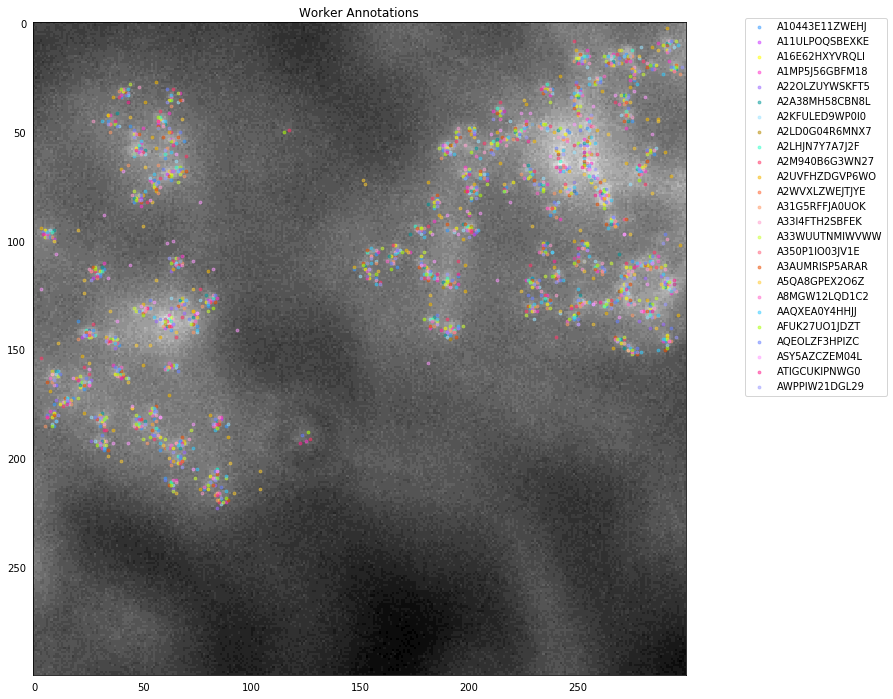

In [5]:
show_workers = True
show_correctness_workers = False
show_centroids = False
show_correctness_centroids = False
show_ref_points = False
show_NN_inc = False
correctness_threshold = 10
worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = True

sa.plot_annotations(anno_one_image, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

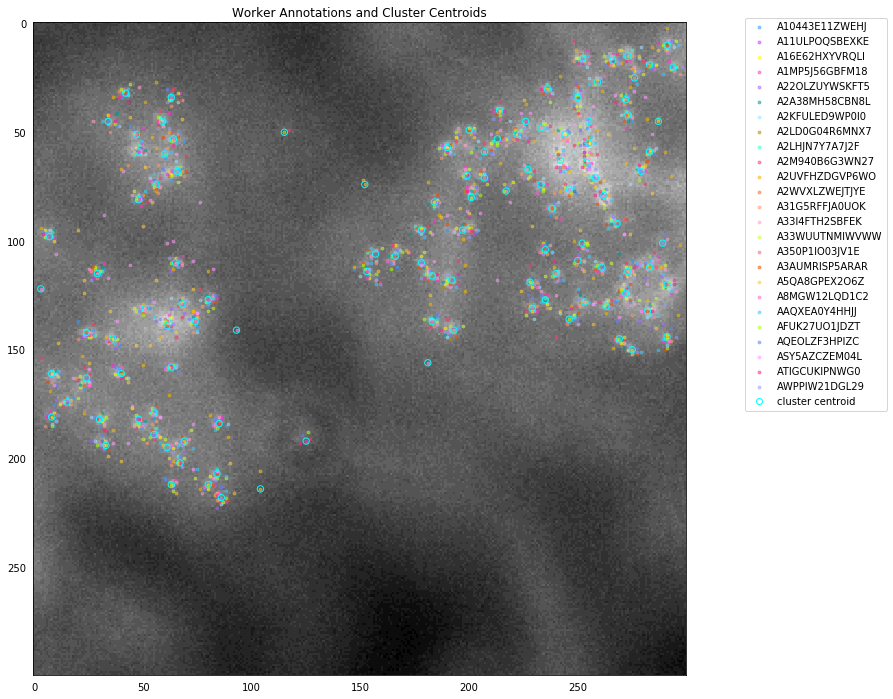

In [6]:
show_centroids = True
sa.plot_annotations(anno_one_image, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

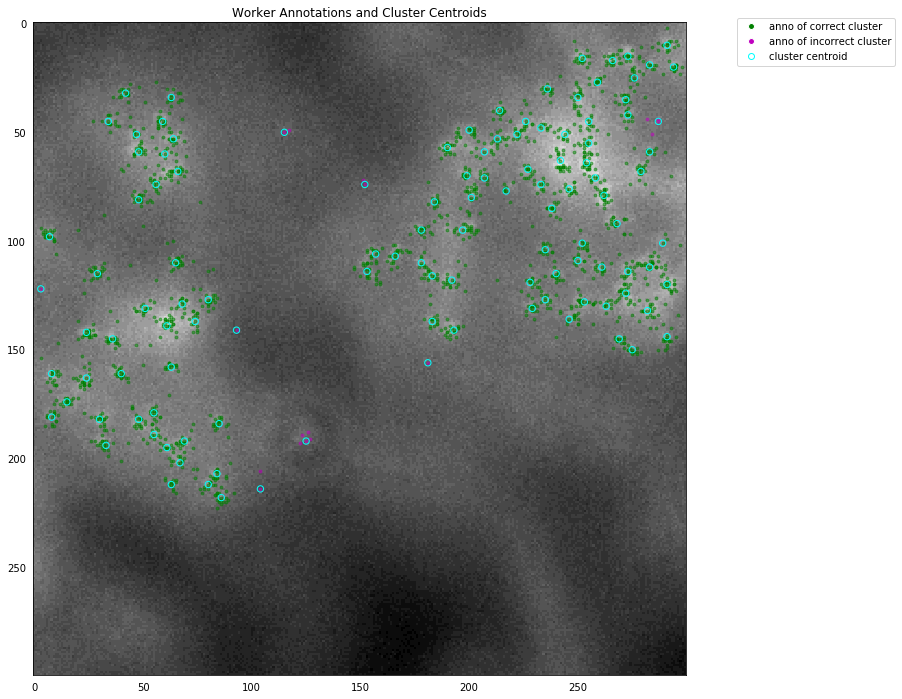

In [7]:
show_correctness_workers = True
sa.plot_annotations(anno_one_image, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

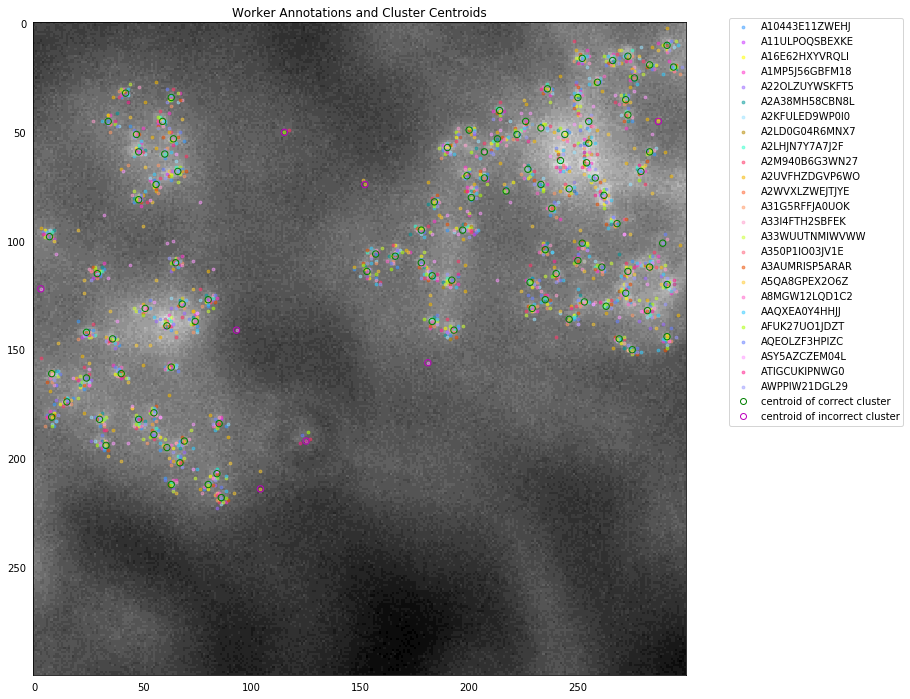

In [8]:
show_correctness_centroids = True
show_correctness_workers = False
sa.plot_annotations(anno_one_image, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

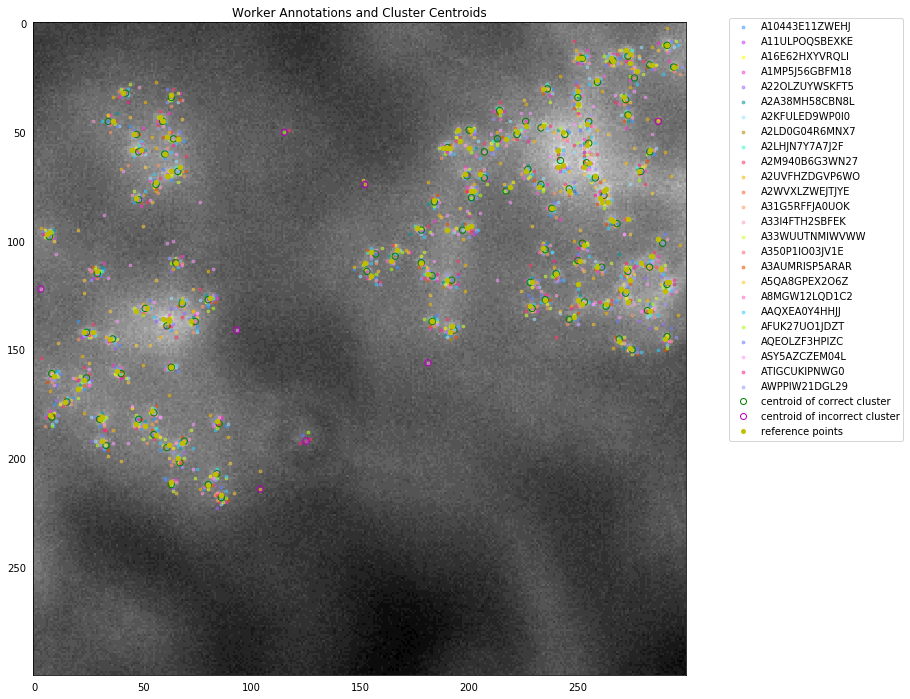

In [9]:
show_ref_points = True
sa.plot_annotations(anno_one_image, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

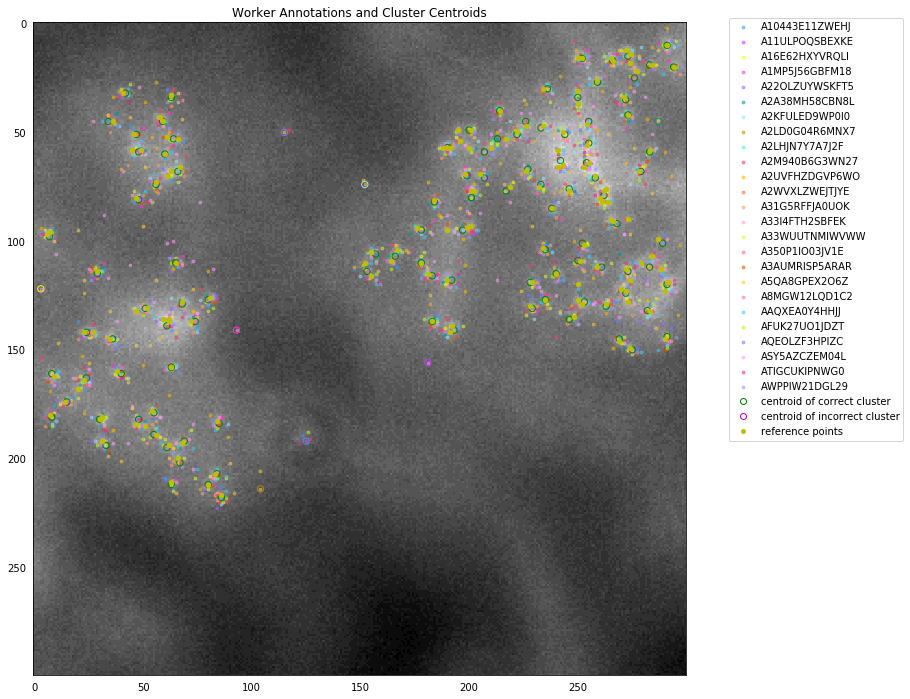

In [10]:
show_NN_inc = True
sa.plot_annotations(anno_one_image, show_workers, show_correctness_workers, show_centroids, show_correctness_centroids, show_ref_points, show_NN_inc, centroid_and_ref_df, correctness_threshold, worker_marker_size, cluster_marker_size, img_filepath, csv_filepath, bigger_window_size)

### Get large clusters
Sort clusters by number of unique annotators. Visualize cluster size threshold.

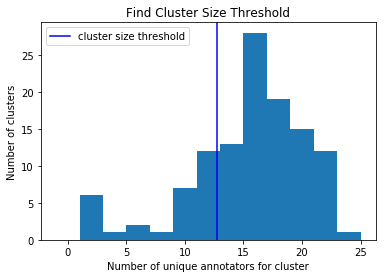

In [11]:
cluster_size_threshold = sa.get_cluster_size_threshold(clusters)
small_clusters, large_clusters = sa.sort_clusters_by_size(clusters, cluster_size_threshold)
sa.plot_cluster_size_threshold(clusters, cluster_size_threshold)

In [12]:
large_centroid_and_ref_df = sa.centroid_and_ref_df(large_clusters, csv_filepath, img_height)
ba.print_head(large_centroid_and_ref_df)

  centroid_x centroid_y NN_x NN_y  NN_dist  \
0        236        270  234  270        2   
1        214        260  214  260        0   
2        244        249  243  250  1.41421   
3        255        245  254  244  1.41421   
4        272        176  272  177        1   

                                             members  
0  [[236, 270, 820, A16E62HXYVRQLI], [238, 268, 6...  
1  [[214, 260, 1083, A16E62HXYVRQLI], [216, 260, ...  
2  [[244, 249, 861, A16E62HXYVRQLI], [246, 250, 8...  
3  [[255, 245, 1202, A16E62HXYVRQLI], [253, 241, ...  
4  [[272, 176, 781, A16E62HXYVRQLI], [272, 174, 6...  


<Figure size 864x504 with 0 Axes>

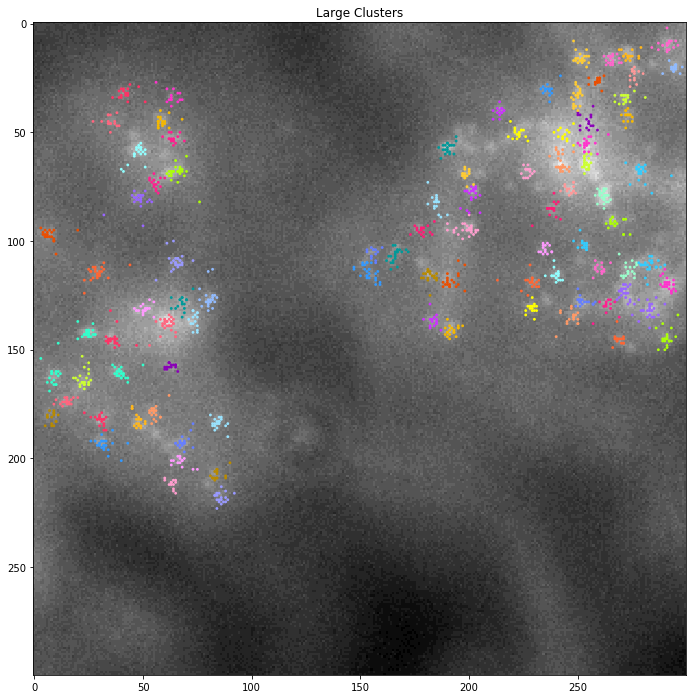

In [13]:
show_workers = True
show_centroids = False
sa.visualize_clusters(large_clusters, show_workers, show_centroids, worker_marker_size, cluster_marker_size, img_filepath, img_height, bigger_window_size)

<Figure size 864x504 with 0 Axes>

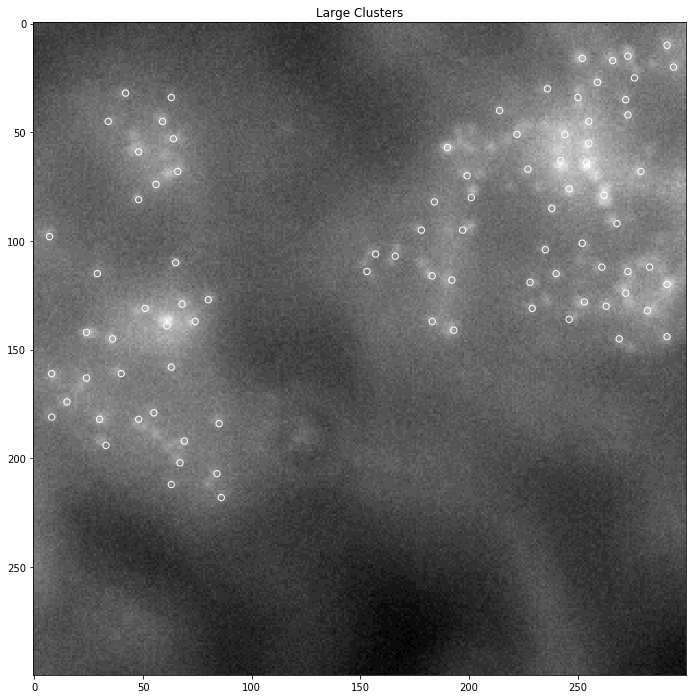

In [14]:
show_workers = False
show_centroids = True
sa.visualize_clusters(large_clusters, show_workers, show_centroids, worker_marker_size, cluster_marker_size, img_filepath, img_height, bigger_window_size)

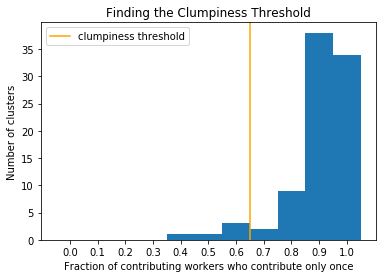

In [15]:
clumpiness_threshold = sa.plot_clumpiness_threshold(large_clusters)

In [16]:
clumpy_clusters, nonclumpy_clusters = sa.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
ba.print_head(clumpy_clusters)

  centroid_x centroid_y                                            members
0        272        176  [[272, 176, 781, A16E62HXYVRQLI], [272, 174, 6...
1        153        186  [[154, 183, 1022, A16E62HXYVRQLI], [152, 187, ...
2        250        266  [[249, 262, 1102, A16E62HXYVRQLI], [249, 267, ...
3        283        188  [[286, 188, 989, A16E62HXYVRQLI], [282, 189, 7...
4        166        193  [[166, 198, 979, A16E62HXYVRQLI], [164, 193, 6...
